In [1]:
# packages to store and manipulate data
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")

# packages for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
df = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum/MSD20k_and_BB.csv')
df.head()

,artist_id,artist_latitude,artist_familiarity,artist_hotness,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotness,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bb_hotsong
0,ARMQHX71187B9890D3,NaN,0.780462,0.574275,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,ARD7TVE1187B99BFB1,NaN,0.581794,0.401998,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,ARMJAGH1187FB546F3,35.14968,0.630630,0.417500,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,ARKRRTF1187B9984DA,NaN,0.487357,0.343428,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,AR7G5I41187FB4CE6C,NaN,0.630382,0.454231,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [3]:
df.shape

(10001, 23)

In [4]:
df_clean=df.drop(['artist_id'], axis=1)
df_clean=df_clean.drop(['artist_latitude'], axis=1)
df_clean=df_clean.drop(['artist_location'], axis=1)
df_clean=df_clean.drop(['artist_longitude'], axis=1)
df_clean=df_clean.drop(['artist_name'], axis=1)
df_clean=df_clean.drop(['key_confidence'], axis=1)
df_clean=df_clean.drop(['mode_confidence'], axis=1)
df_clean=df_clean.drop(['release'], axis=1)
df_clean=df_clean.drop(['time_signature_confidence'], axis=1)
df_clean=df_clean.drop(['title'], axis=1)
df_clean=df_clean.drop(['year'], axis=1)
df_clean=df_clean.dropna()
df_clean.shape

(5648, 12)

In [5]:
df_clean.head()

,artist_familiarity,artist_hotness,duration,end_of_fade_in,key,loudness,mode,song_hotness,start_of_fade_out,tempo,time_signature,bb_hotsong
0,0.780462,0.574275,280.21506,0.238,5,-3.306,1,0.597641,275.528,173.205,5,0
1,0.581794,0.401998,218.93179,0.247,1,-11.197,0,0.602120,218.932,92.198,4,0
5,0.651046,0.401724,209.60608,0.066,2,-4.501,1,0.604501,198.699,129.738,4,0
9,0.426668,0.332276,269.81832,5.300,4,-13.496,1,0.265861,258.990,86.643,4,0
11,0.360031,0.296269,218.77506,2.125,5,-10.021,0,0.000000,207.012,146.765,1,0


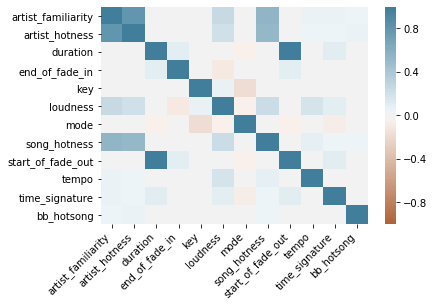

In [6]:
# initial correlation plot
correlation = df_clean.corr()
axis = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 230, n=200)
)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# notable correlations of song hotness are artist hotness/familiarity which make 
# sense and to a lesser degree loudness.

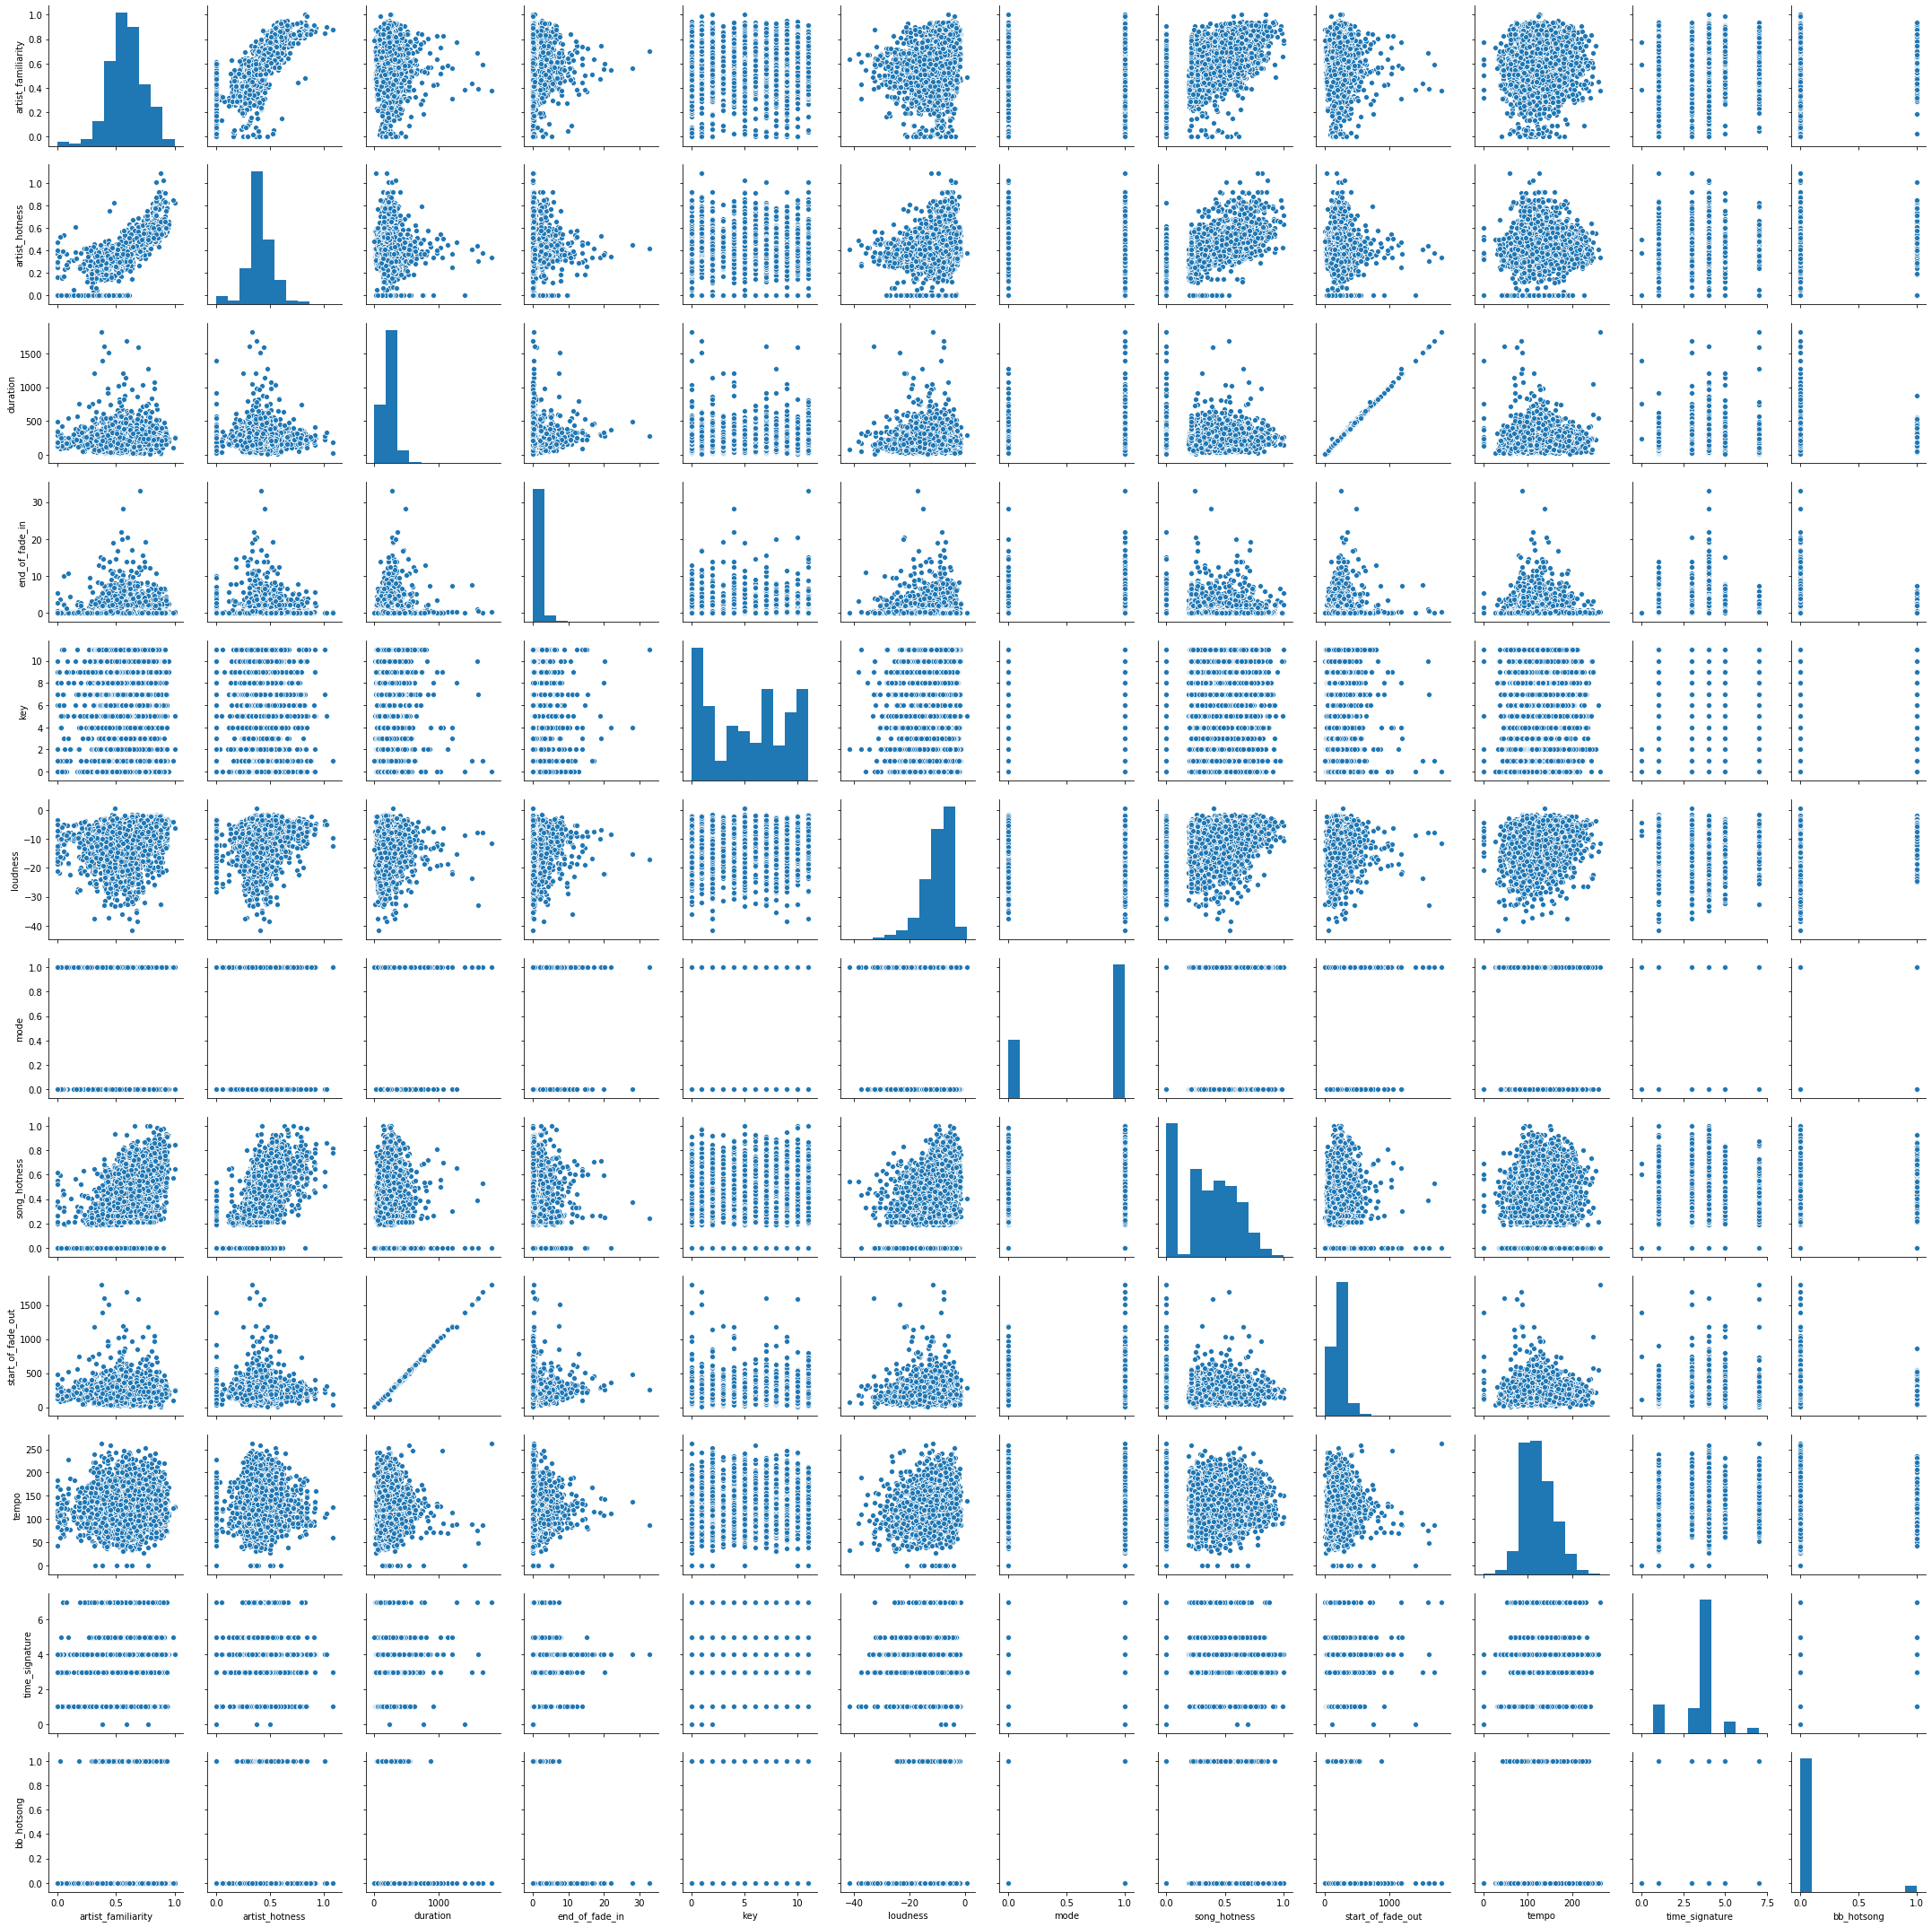

In [7]:
# variable pair plot
sns.pairplot(df_clean);

In [8]:
def distrib(col):
    graph = sns.kdeplot(df_clean[col][(df_clean["bb_hotsong"] == 1)], color="Gray", shade = True)
    graph.set_xlabel(col)
    graph.set_ylabel("Frequency")
    plt.show()

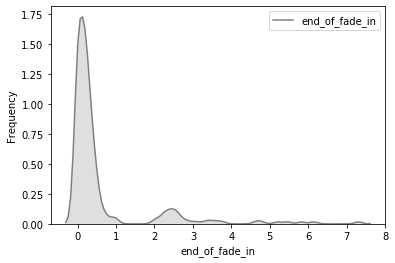

In [9]:
distrib("end_of_fade_in")

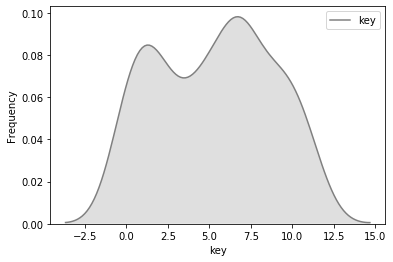

In [10]:
distrib("key")

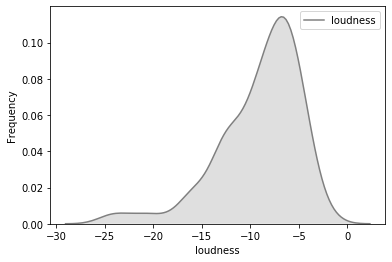

In [11]:
distrib("loudness")

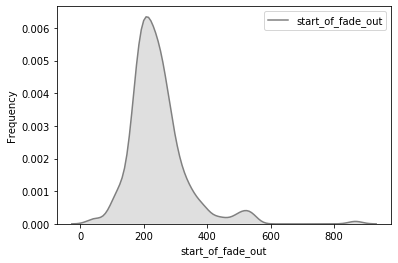

In [12]:
distrib("start_of_fade_out")

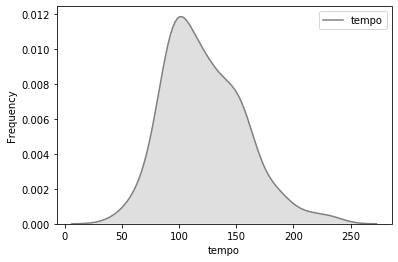

In [13]:
distrib("tempo")